In [1]:
# Imports
import numpy as np
from src.utils.evaluate import evaluate
from src.utils.linear_regressor import perform_linear_regression
from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y = columns

/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/inD/x_y_recording_00_range_384.csv
/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/scenario_samples/lane_merging/dif_set/test_set_00.csv


In [2]:
# Target vector y
y = np.concatenate([a_x[0:-2], a_y[0:-2]])    # a(k)
y.shape


(410546,)

Mean Squared Error (MSE): 3.0955e-03
Mean Absolute Error (MAE): 1.1690e-02
R-squared (R²) Score: 9.9060e-01
Coefficients:
-0.9952445671614876
-7.628629025987907e-05


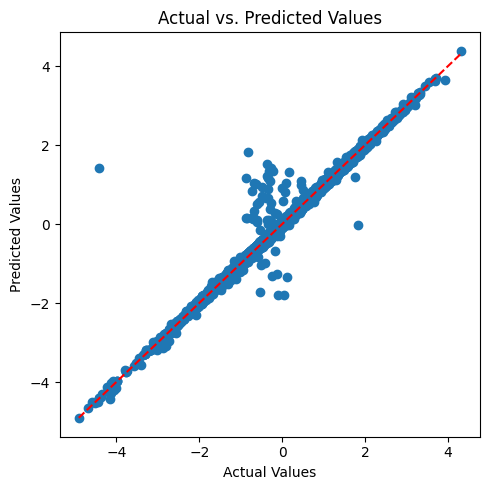

In [3]:
# Input features X_first_model of the first model
A = - a_x[1:-1]                
B = - a_y[1:-1]                

C = v_x[2:] - v_x[1:-1]        
D = v_y[2:] - v_y[1:-1]        


X_first_model = np.vstack((
 np.column_stack((A, C)),
 np.column_stack((B, D))
))

X_first_model.shape

# First model
first_model = perform_linear_regression(X_first_model, y)

(410546, 2)
Mean Squared Error (MSE): 3.0955e-03
Mean Absolute Error (MAE): 1.1690e-02
R-squared (R²) Score: 9.9060e-01
Coefficients:
-0.9952416326195912
1.5983549942566857e-06


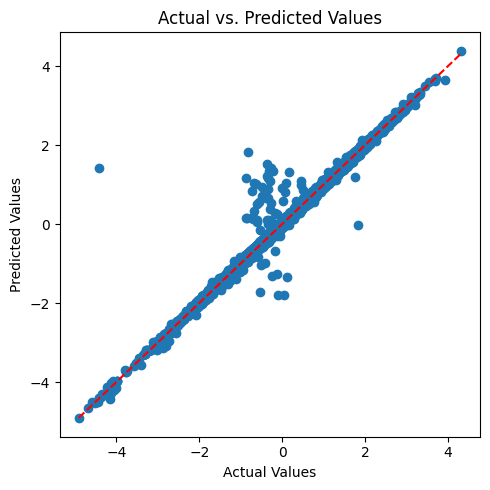

In [4]:
# Input features X_second_model of the second model
dt = 0.04

A = - a_x[1:-1]                                 
B = - a_y[1:-1]                                 

#C = v_x[2:] - v_x[1:-1]        
#D = v_y[2:] - v_y[1:-1]        
C = s_x[2:] - s_x[1:-1] - dt* v_x[1:-1]        
D = s_y[2:] - s_y[1:-1] - dt* v_y[1:-1]        

X_second_model = np.vstack((
    np.column_stack((A, C)), 
    np.column_stack((B, D))
    ))
print(X_second_model.shape)

second_model = perform_linear_regression(X_second_model, y)



In [5]:
# Get the a_x_test and the a_y_test
c_1_overline = first_model.coef_[0]
c_2_overline = first_model.coef_[1]
c_3_overline = second_model.coef_[0]
c_4_overline = second_model.coef_[1]

c_2 = 1 /( c_2_overline)
c_1 = c_1_overline* c_2
c_4 = 1 / (c_4_overline)
c_3 = c_3_overline * c_4

s_x_0 = s_x[:-2]
s_y_0 = s_y[:-2]
s_x_1 = s_x[1:-1]
s_y_1 = s_y[1:-1]
s_x_2 = s_x[2:]
s_y_2 = s_y[2:]
v_x_1 = v_x[1:-1]
v_y_1 = v_y[1:-1]
v_x_2 = v_x[2:]
v_y_2 = v_y[2:]
a_x_1 = a_x[1:-1]
a_y_1 = a_y[1:-1]
a_x_0 = a_x[:-2]
a_y_0 = a_y[:-2]




Mean Squared Error (MSE): 4.0794e+01
Mean Absolute Error (MAE): 6.3870e+00
R-squared (R²) Score: 2.1377e-01


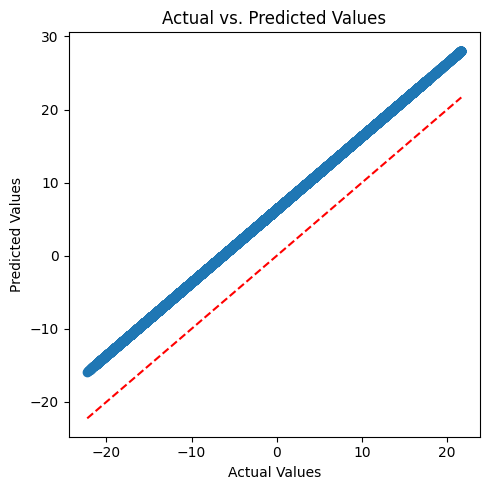

Mean Squared Error (MSE): 4.0794e+01
Mean Absolute Error (MAE): 6.3870e+00
R-squared (R²) Score: -1.4968e+00


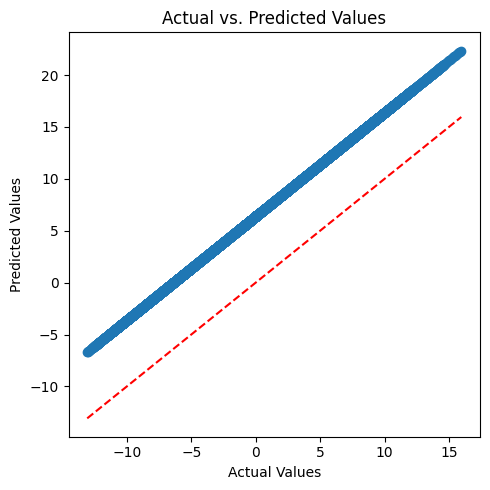

In [8]:
a_xy_0_pred_first_model= first_model.predict(X_first_model)

half = int(len(a_xy_0_pred_first_model)/2)

a_x_0_pred = a_xy_0_pred_first_model [:half]
a_y_0_pred = a_xy_0_pred_first_model [half:]

v_x_2_pred = c_2* a_x_0_pred  + c_1* a_x_1 +  v_x_1
v_y_2_pred = c_2* a_y_0_pred  + c_1* a_y_1 +  v_y_1

evaluate(v_x_2, v_x_2_pred)
evaluate(v_y_2, v_y_2_pred)


Mean Squared Error (MSE): 9.3063e+04
Mean Absolute Error (MAE): 3.0506e+02
R-squared (R²) Score: -5.1958e+01


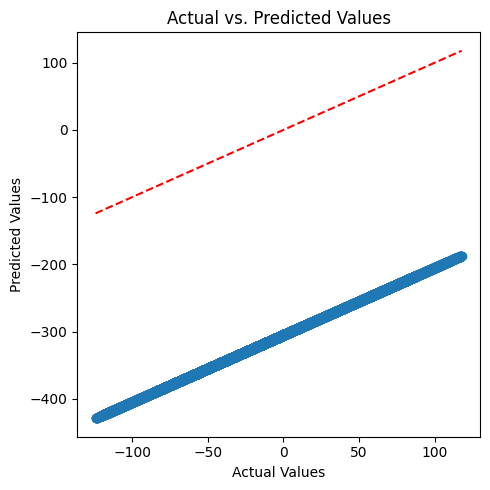

Mean Squared Error (MSE): 9.3063e+04
Mean Absolute Error (MAE): 3.0506e+02
R-squared (R²) Score: -1.1193e+02


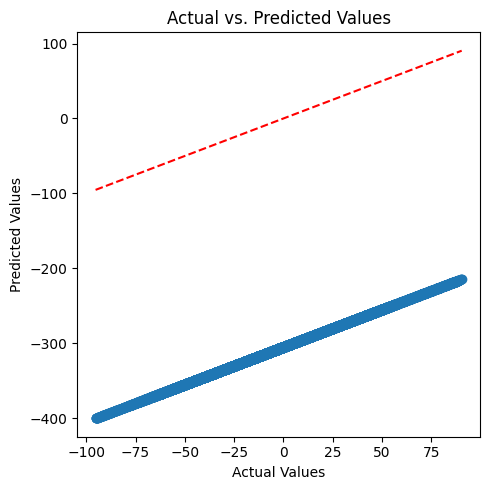

In [7]:

a_xy_0_pred_second_model= second_model.predict(X_second_model)

half = int(len(a_xy_0_pred_second_model)/2)

a_x_0_pred = a_xy_0_pred_second_model [:half]
a_y_0_pred = a_xy_0_pred_second_model [half:]

s_x_2_pred = s_x_1 + dt * v_x_1 + c_3 * a_x_1 + c_4 * a_x_0_pred
s_y_2_pred = s_y_1 + dt * v_y_1 + c_3 * a_y_1 + c_4 * a_y_0_pred

evaluate(s_x_2, s_x_2_pred)
evaluate(s_y_2, s_y_2_pred)
